<a href="https://colab.research.google.com/github/Cpano98/vision-computacional-equipo5/blob/semana3-edgar/3.2_SpatialDomainImageEnhancementAlgorithms/3.2_SpatialDomainImageEnhancementAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.2 Google Colab – Spatial Domain Image Enhancement Algorithms
## Computer Vision for Images and Video (TC4033 - Group 10)

- **School**: School of Engineering and Sciences, Tecnológico de Monterrey
- **Lead Professor**: Dr. Gilberto Ochoa Ruiz
- **Assistant Professor**: MIP Ma. del Refugio Melendez Alfaro
- **Tutor Professor**: Iván Reyes Amezcua
- **Team 5**:
  - Benjamin Cisneros Barraza - A01796323
  - Jonatan Israel Meza Mendoza - A01275322
  - Carlos Pano Hernández - A01066264
  - Edgar Omar Cruz Mendoza - A01795590
- **Date**: Sunday, September 28th, 2025


## 🎯 Objective

In this session, we explore image enhancement techniques using convolution-based methods in the spatial domain. We begin by implementing basic filters to reinforce theoretical concepts, followed by enhancement techniques discussed in class.

---

## 📚 Theoretical Background

- Brief explanation of spatial domain filtering.
- Overview of convolution and kernel operations.
- Reference: Chapter 3 of *Digital Image Processing* by Gonzalez & Woods.

---

## 🧪 Section 1: Basic Line Detectors (Without OpenCV)


### 1.1 Prewitt Operator
The Prewitt operator is a gradient-based edge detection operator. It works by approximating the image's derivative in the horizontal and vertical directions. It uses two 3x3 convolution masks (kernels) to compute the magnitude and direction of the gradient at each point in the image. It is effective for detecting edges and is relatively simple to implement.

### Definition of the Prewitt Kernels

The **Prewitt operator** uses two 3x3 convolution kernels to calculate an approximation of the image's gradient. Each kernel is designed to detect intensity changes in a specific direction.

---

#### Horizontal Gradient Kernel ($G_x$)

This kernel detects **vertical edges** by measuring the difference in pixel intensity between the left and right sides.
```
Gx=  -1  0  +1
     -1  0  +1
     -1  0  +1
```

* The **-1** column subtracts the pixel values on the left.
* The **+1** column adds the pixel values on the right.
* The **0** column ignores the central column of pixels.

A result with a high absolute value indicates a sharp vertical edge.

---

#### Vertical Gradient Kernel ($G_y$)

This kernel detects **horizontal edges** by measuring the intensity difference between the pixels above and below.
```
Gy =  -1 -1 -1
       0  0  0
      +1 +1 +1
```

* The **-1** row subtracts the pixel values from the top row.
* The **+1** row adds the pixel values from the bottom row.
* The **0** row ignores the middle row.

A result with a high absolute value indicates the presence of a strong horizontal edge.

### Prewitt implementation

- **Library**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter # Import gaussian_filter
from google.colab import drive
import matplotlib.image as mpimg

- **Connect Googledrive**

In [11]:
drive.mount('/content/drive')
image1 = mpimg.imread('/content/drive/MyDrive/Informacion del ITESM/Colab Notebooks (ITESM)/Vision computacional/data/Prewitt_kernels_2.jpg')
image_original = image1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- **Define the Prewitt kernels**

Applying gaussian smoothing to reduce noise, which can cause false edges.

In [12]:
def prewitt_operator(image, sigma=1): # Add sigma parameter for Gaussian filter
    # Apply Gaussian smoothing
    image_smooth = gaussian_filter(image, sigma=sigma)

    kernel_x = np.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ])

    kernel_y = np.array([
        [-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1, 1]
    ])

    # 2. Apply convolution to get the gradients
    Gx = convolve2d(image_smooth, kernel_x, mode='same', boundary='symm') # Apply to smoothed image
    Gy = convolve2d(image_smooth, kernel_y, mode='same', boundary='symm') # Apply to smoothed image

    # 3. Calculate the gradient magnitude
    magnitude = np.sqrt(Gx**2 + Gy**2)

    # 4. Normalize the magnitude to be able to display it as an image (0-255 range)
    if np.max(magnitude) > 0:
        magnitude = magnitude * 255.0 / np.max(magnitude)

    return Gx, Gy, magnitude.astype(np.uint8)

- **Visualization**

Implementing the Prewitt operator using convolution. This implementation includes an option for applying Gaussian smoothing to the image before applying the Prewitt kernels, which helps in reducing noise.

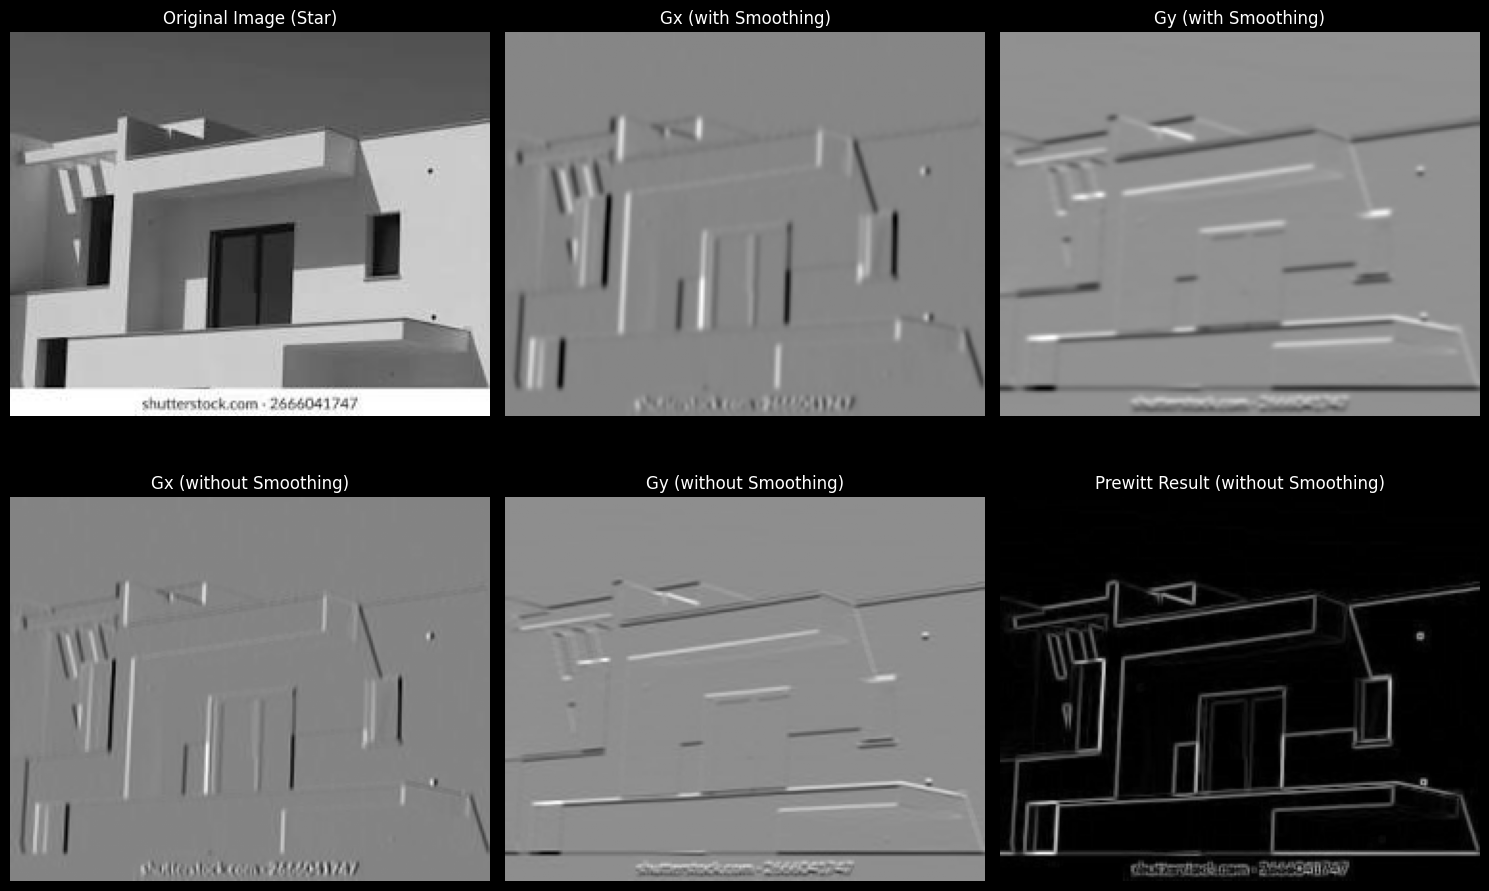

In [19]:
if __name__ == "__main__":

    # Load the image
    image_original = image1 # Use the image loaded previously

    # Convert to grayscale (if not already) and to float type
    # The operator needs a single-channel image (grayscale)
    if image_original.ndim == 3:
        image_gray_float = color.rgb2gray(image_original)
    else:
        image_gray_float = image_original.astype(float)

    # Apply the Prewitt operator with Gaussian smoothing (sigma=1)
    Gx_smooth, Gy_smooth, prewitt_result_smooth = prewitt_operator(image_gray_float, sigma=1)

    # Apply the Prewitt operator without Gaussian smoothing (sigma=0)
    Gx_nosmooth, Gy_nosmooth, prewitt_result_nosmooth = prewitt_operator(image_gray_float, sigma=0)


    # Configure the visualization style
    plt.style.use('dark_background')

    # Create the figure to display the results
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10)) # Adjusted for 6 subplots
    ax = axes.ravel()

    # Display the original image
    ax[0].imshow(image_original, cmap='gray')
    ax[0].set_title("Original Image (Star)")
    ax[0].axis('off')

    # Display the horizontal gradient with smoothing
    ax[1].imshow(Gx_smooth, cmap='gray')
    ax[1].set_title("Gx (with Smoothing)")
    ax[1].axis('off')

    # Display the vertical gradient with smoothing
    ax[2].imshow(Gy_smooth, cmap='gray')
    ax[2].set_title("Gy (with Smoothing)")
    ax[2].axis('off')

    # Display the horizontal gradient without smoothing
    ax[3].imshow(Gx_nosmooth, cmap='gray')
    ax[3].set_title("Gx (without Smoothing)")
    ax[3].axis('off')

    # Display the vertical gradient without smoothing - Add this back
    ax[4].imshow(Gy_nosmooth, cmap='gray')
    ax[4].set_title("Gy (without Smoothing)")
    ax[4].axis('off')

    # Display the Prewitt result without smoothing - Move this to the last position
    ax[5].imshow(prewitt_result_nosmooth, cmap='gray')
    ax[5].set_title("Prewitt Result (without Smoothing)")
    ax[5].axis('off')

    fig.tight_layout()
    plt.show()

### Summary of Prewitt Operator Usage

The Prewitt operator is a simple and effective gradient-based edge detection method. It utilizes 3x3 kernels to approximate the image gradient in horizontal and vertical directions, effectively highlighting vertical and horizontal edges. Its output provides information about the magnitude of intensity changes, which can be used to identify potential edges in an image. While sensitive to noise, applying smoothing techniques like Gaussian blur beforehand can help mitigate this issue and improve the results.

### 1.2 Sobel Operator

The Sobel operator is another gradient-based edge detection method, similar to the Prewitt operator, but it uses different kernels that give more weight to the pixels closer to the center of the mask. This weighting provides a slightly smoother estimate of the gradient and can be less sensitive to noise compared to the Prewitt operator.

### 📝 Sobel Kernel Definition

The **Sobel operator** is an edge detector that improves upon the Prewitt operator by giving more weight to the pixels closer to the center of the mask. This provides a better gradient approximation and greater resistance to image noise.

---

#### Horizontal Gradient Kernel ($G_x$)

This kernel detects **vertical edges**. The `2` in the center row gives more weight to the pixels on either side of the point being analyzed.
```
Gx =  -1  0  +1
      -2  0  +2
      -1  0  +1
```

---

#### Vertical Gradient Kernel ($G_y$)

This kernel detects **horizontal edges**. The `2` in the center column gives more weight to the pixels directly above and below the point of interest.
```
Gy =  -1 -2 -1
       0  0  0
      +1 +2 +1
```

#### Python Implementation

Implementing the Sobel operator using convolution, similar to the Prewitt operator. We will also include the option for Gaussian smoothing before applying the kernels.

In [7]:
def sobel_operator(image, sigma=1):
    # Apply Gaussian smoothing
    image_smooth = gaussian_filter(image, sigma=sigma)

    kernel_x = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])

    kernel_y = np.array([
        [-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2, 1]
    ])

    # Apply convolution to get the gradients
    Gx = convolve2d(image_smooth, kernel_x, mode='same', boundary='symm')
    Gy = convolve2d(image_smooth, kernel_y, mode='same', boundary='symm')

    # Calculate the gradient magnitude
    magnitude = np.sqrt(Gx**2 + Gy**2)

    # Normalize the magnitude
    if np.max(magnitude) > 0:
        magnitude = magnitude * 255.0 / np.max(magnitude)

    return Gx, Gy, magnitude.astype(np.uint8)

#### Example Image and Result

Now, let's apply the Sobel operator to an example image and visualize the results, including the gradients and the final magnitude image, both with and without Gaussian smoothing for comparison.

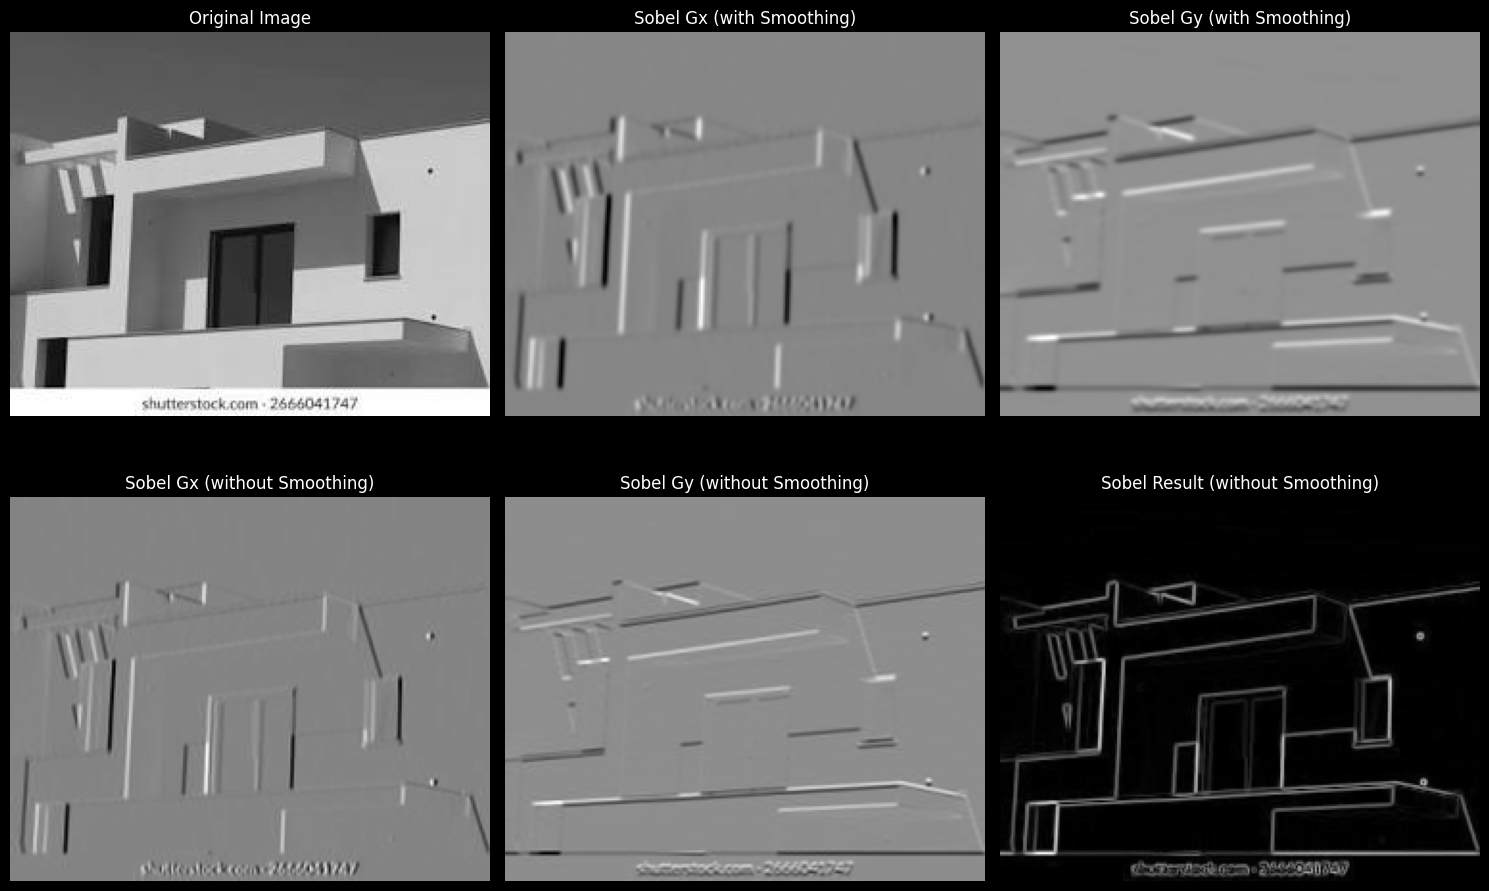

In [16]:
if __name__ == "__main__":
    # Load the image (using the image loaded previously)
    image_original = image1

    # Convert to grayscale and float type
    if image_original.ndim == 3:
        image_gray_float = color.rgb2gray(image_original)
    else:
        image_gray_float = image_original.astype(float)

    # Apply the Sobel operator with Gaussian smoothing (sigma=1)
    Gx_sobel_smooth, Gy_sobel_smooth, sobel_result_smooth = sobel_operator(image_gray_float, sigma=1)

    # Apply the Sobel operator without Gaussian smoothing (sigma=0)
    Gx_sobel_nosmooth, Gy_sobel_nosmooth, sobel_result_nosmooth = sobel_operator(image_gray_float, sigma=0)

    # Configure the visualization style
    plt.style.use('dark_background')

    # Create the figure to display the results
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    ax = axes.ravel()

    # Display the original image
    ax[0].imshow(image_original, cmap='gray')
    ax[0].set_title("Original Image")
    ax[0].axis('off')

    # Display the horizontal gradient with smoothing
    ax[1].imshow(Gx_sobel_smooth, cmap='gray')
    ax[1].set_title("Sobel Gx (with Smoothing)")
    ax[1].axis('off')

    # Display the vertical gradient with smoothing
    ax[2].imshow(Gy_sobel_smooth, cmap='gray')
    ax[2].set_title("Sobel Gy (with Smoothing)")
    ax[2].axis('off')

    # Display the horizontal gradient without smoothing
    ax[3].imshow(Gx_sobel_nosmooth, cmap='gray')
    ax[3].set_title("Sobel Gx (without Smoothing)")
    ax[3].axis('off')

    # Display the vertical gradient without smoothing
    ax[4].imshow(Gy_sobel_nosmooth, cmap='gray') # Add back the Gy without smoothing
    ax[4].set_title("Sobel Gy (without Smoothing)") # Set the title
    ax[4].axis('off')

    # Display the Sobel result without smoothing - this will now be in the 6th position
    ax[5].imshow(sobel_result_nosmooth, cmap='gray')
    ax[5].set_title("Sobel Result (without Smoothing)")
    ax[5].axis('off')


    fig.tight_layout()
    plt.show()

### Summary of Sobel Operator Usage

The Sobel operator is a widely used gradient-based edge detection method. Similar to the Prewitt operator, it approximates the image gradient using 3x3 kernels. However, the Sobel operator's kernels are designed to give more weight to the central pixels, providing a slightly smoother and often more accurate estimate of the gradient, making it less susceptible to noise than the Prewitt operator. The output of the Sobel operator highlights potential edges by showing the magnitude of intensity changes. It is commonly used in various computer vision applications for edge detection and feature extraction.

### 1.3 Laplacian Operator
- Kernel definition
- Python implementation
- Example image and result
- Complexity analysis

### 🧠 Comparative Analysis
- Which operator is more efficient?
- Visual and computational comparison.
- Argumentative response with references.

## 🧪 Section 2: Image Enhancement via Line Extraction

### 2.1 Method Description
- Extract lines using one of the above operators.
- Subtract line mask from original image.
- Multiply line mask by alpha > 1 and add to original image.

### 2.2 Python Implementation
- Step-by-step code.
- Parameter tuning (e.g., alpha values).
- Visual results.

### 2.3 Discussion
- How does this method enhance image features?
- Limitations and possible improvements.
---

## 🧪 Section 3: Medical Image Enhancement (Figure 3.43 Inspired)

### 3.1 Source Image
- Load a medical image (e.g., PET scan).
- Reference to textbook example.

### 3.2 Multi-stage Processing
- Apply a sequence of filters (e.g., smoothing, edge detection, enhancement).
- Combine results as shown in Figure 3.43.

### 3.3 Python Implementation
- Modular code for each stage.
- Final composite result.


### 3.4 Discussion
- How does this technique improve diagnostic visibility?
- Comparison with single-stage methods.

---

## 📸 Results Summary

- Side-by-side comparisons of original and processed images.
- Screenshots for PDF export.
- Optional metrics (e.g., contrast, sharpness).
---

## 📝 Argumentative Responses

- Complexity analysis of filters.
- Justification of enhancement method.
- Application relevance in medical imaging.
- Academic writing style with references.

---

## 🔗 Resources

- [LearnOpenCV – Image Filtering](https://learnopencv.com/image-filtering-using-convolution-in//pyimagesearch.com/2016/07/25/convolutionsksforgeeks.org/spatial-filters-averaging Ed.). *Digital Image Processing*. Pearson.
